In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# snowflake geometry setup
angle = np.deg2rad(60)  # snowflake angle, fixed
central_string = np.array([25, 50])  # position of central string
rotation_angle = np.deg2rad(30)  # rotation angle of full snowflake
rot_mat = np.array(
    [
        np.array([np.cos(rotation_angle), -np.sin(rotation_angle)]),
        np.array([np.sin(rotation_angle), np.cos(rotation_angle)]),
    ]
)
outer_scale = 100  # distance from center to outer strings
# distance from center to inner strings, fixed based on outer-string distance:
inner_scale = outer_scale / np.sqrt(3)
string_positions = central_string + np.array(
    [
        rot_mat @ np.array([0, 0]),  # center
        rot_mat @ np.array([0, 1]) * outer_scale,  # outer
        rot_mat @ np.array([0, -1]) * outer_scale,
        rot_mat @ np.array([np.cos(angle / 2), np.sin(angle / 2)]) * outer_scale,
        rot_mat @ np.array([np.cos(angle / 2), -np.sin(angle / 2)]) * outer_scale,
        rot_mat @ np.array([-np.cos(angle / 2), np.sin(angle / 2)]) * outer_scale,
        rot_mat @ np.array([-np.cos(angle / 2), -np.sin(angle / 2)]) * outer_scale,
        rot_mat @ np.array([1, 0]) * inner_scale,  # inner
        rot_mat @ np.array([np.cos(angle * 2), np.sin(angle * 2)]) * inner_scale,
        rot_mat @ np.array([np.cos(angle * 2), -np.sin(angle * 2)]) * inner_scale,
    ]
)


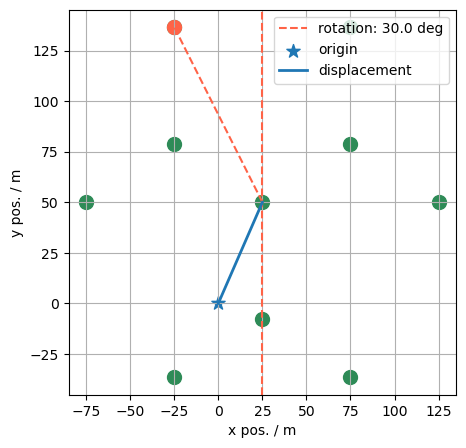

In [3]:
# visualization
size = 100
color = "seagreen"
ref_color = "tomato"
plt.figure(figsize=(5, 5))
plt.scatter(string_positions[:, 0], string_positions[:, 1], s=size, c=color)
# ref string to visualize rotation:
plt.scatter(string_positions[1, 0], string_positions[1, 1], s=size, c=ref_color)
# visualize rotation
plt.axvline(central_string[0], color=ref_color, ls="--")
plt.plot(
    [central_string[0], string_positions[1, 0]],
    [central_string[1], string_positions[1, 1]],
    color=ref_color,
    ls="--",
    label=f"rotation: {np.rad2deg(rotation_angle):1.1f} deg",
)
# visualize displacement of central string:
plt.scatter(0, 0, marker="*", s=size, color="tab:blue", label="origin")
plt.plot(
    [0, string_positions[0, 0]],
    [0, string_positions[0, 1]],
    lw=2,
    label="displacement",
    color="tab:blue",
)
plt.grid()
plt.xlabel("x pos. / m")
plt.ylabel("y pos. / m")
plt.legend()
